# Python Homework 1

**Release date:** Friday, April 3<br>
**Due date:** Friday, April 17, at midnight via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename __PythonHW1_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (5 Points)

1. Implement the simulation of a Poisson process $(N_t)_{0 \leq t \leq 100}$ with parameter $\lambda = 0.1$ on the time interval $[0,100]$. 

In [2]:
%matplotlib inline
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD COMMENTS TO YOUR CODE!
#Using method 1
def Poisson(lamda,t):
    deltaTs = np.arange(0,t,step = t/1000) # creates time from 0,100s with delta T = 1
    deltaNts = np.random.poisson(deltaTs[1] * 0.1, size = 999) #creates deltaNts of length 999
    deltaNts = np.insert(deltaNts, obj = 0, values =0)# concat deltaNts with 0 at the front so we make sure No = 0 & length = 1000
    Nts = np.cumsum(deltaNts) # N(i+1)deltaT = N(i)deltaT + deltaNts.i.e: N1 = N0+ deltaN1 s.t. N(k) = N0+deltaN1+..+deltaN(k-1)
    return Nts
def time(t):
    deltaTs = np.arange(0,t,step = t/1000) # creates time from 0,100s with delta T = 1
    return deltaTs

x= time(100) # time from 0 to 100 s Length of 101

Nts= Poisson(0.1,100) # Poisson RV at time from 0 to 100 total of 101


2. Plot a trajectory of your simulated process from part 1. 

[]

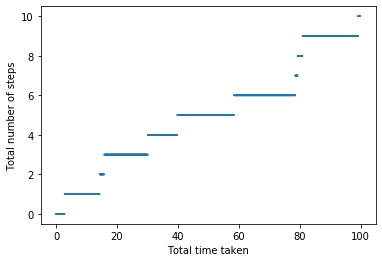

In [3]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD COMMENTS TO YOUR CODE!

#function to plot without vertical lines, 
def mystep(x,y, ax=None, **kwargs):
    x = np.array(x)
    y = np.array(y)
    X = np.c_[x[:-1],x[1:],x[1:]]
    Y = np.c_[y[:-1],y[:-1],np.zeros_like(x[:-1])*np.nan]
    if not ax: ax=plt.gca()
    return ax.plot(X.flatten(), Y.flatten(), **kwargs)


mystep(x,Nts)
plt.xlabel("Total time taken")
plt.ylabel("Total number of steps")
plt.plot()

## Problem 2 (5 Points)

1. Simulate a __compound Poisson process__ $(C_t)_{0 \leq t \leq 30}$ (see __Lecture 4__) with parameter $\lambda=1/2$ on the time interval $[0,30]$ where the jumps $Y_1, Y_2, \ldots$ are given as random variables

$$ Y_i = e^{Z_i} \qquad (i = 1,2,\ldots)$$

with $Z_1, Z_2, \ldots$ i.i.d. normally distributed random variables with mean 0 and variance 1 (also independent of the underlying Poisson process $(N_t)_{0 \leq t \leq 30}$). Plot a trajectory of your simulated process.

*Hint*: Use your method from Problem 1 to simulate the underlying Poisson Process $(N_t)_{0 \leq t \leq 30}$ driving the compound Poisson process $(C_t)_{0 \leq t \leq 30}$.

In [4]:
def CompoundPoissonProcess(lamba,t):
    Zi = np.random.normal(loc=0.0, scale=1.0, size = 1000) # creates RVs Z of size 31, not 30 since t = 0,1,2,..,30
    Yi = np.exp(Zi) # Yi = e^Zi
    Nt = Poisson(lamba, t) 
    index_of_the_jumps = np.nonzero(np.r_[0, np.diff(Nt)[:-1]])
    # gives the index at which next jump happens and its length is the number of jumps
    cumsumYi = np.cumsum(Yi) # to prepare for Ct, Y1, Y1+Y2,...,Y1+...+Yn
    Ct = cumsumYi[0:np.size(index_of_the_jumps)] # gives sum of Y1,Y2,...Y(Nt) # total number of jumps is total number of sums for last Ct
    return Ct

[]

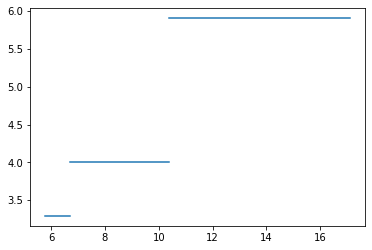

In [5]:
#Prepping the plotting see above
Zi = np.random.normal(loc=0.0, scale=1.0, size = 1000) # creates RVs Z of size 31, not 30 since t = 0,1,2,..,30
Yi = np.exp(Zi) # Yi = e^Zi
Nt = Poisson(0.5,30) 
# gives the index at which next jump happens and its length is the number of jumps
index_of_the_jumps = np.nonzero(np.r_[0, np.diff(Nt)[:-1]])


x = time(30)
time_of_jump = x[index_of_the_jumps] # value of times at which jump happens


# Ct
cumsumYi = np.cumsum(Yi) # to prepare for Ct
Ct = cumsumYi[0:np.size(time_of_jump)] # gives sum of Y1,Y2,...Y(Nt) # total number of jumps is total number of sums for
#Plotting
mystep(time_of_jump,Ct)
plt.plot()

2. Simulate $M=10000$ times the compound Poisson process from part 1 and compute the empricial mean and variance of your samples for the random variable $C_{30}$. Compare your empricial values with the exact theoretical values which are given by

$$\mathbb{E}[C_{30}] = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y_1] \qquad \text{and} \qquad \text{Var}(C_{30}) = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y^2_1].$$

*Hint*: Recall that 
$$\mathbb{E}[e^{Z_1}] = e^{0.5} \qquad \text{and} \qquad  \mathbb{E}[(e^{Z_1})^2] = e^2.$$

In [6]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD COMMENTS TO YOUR CODE! 
def CPSmean(simulations):
    totalsum = 0 
    for i in range(simulations):
        a = CompoundPoissonProcess(0.5,30)
        if len(a) != 0:
            totalsum = totalsum + a.item(-1) #sum with last item AKA C30 
        else:
            totalsum = totalsum 
        return totalsum/simulations
print("Mean of RV C30 is ")
print(CPSmean(10000))

def CPSvar(simulations):
    totalsum = 0 
    squaredsum = 0
    for i in range(simulations):
        a = CompoundPoissonProcess(0.5,30)
        if len(a) != 0:
            totalsum = totalsum + a.item(-1)
            squaredsum = squaredsum + (a.item(-1))**2 #sum with  last item AKA C30 
        else:
            totalsum = totalsum 
            squaredsum = squaredsum
        variance = (squaredsum/simulations) - (totalsum/simulations)**2 # squared average - average squared
        return variance
    
print("Variance of RV C30 is ")    
print(CPSvar(10000))

Mean of RV C30 is 
0.0
Variance of RV C30 is 
0.0008103013101133377
